In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("Automobile_insurance_fraud.csv")

data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
data.shape

(1000, 40)

Our dataset contains 1000 rows(observations) and 40 columns(features).

Now checking missing values.

In [6]:
data.isnull().any().sum()

1

Our data has only one null value.

Now we will check the stats for fraud reported using bar plot.

<AxesSubplot:xlabel='fraud_reported'>

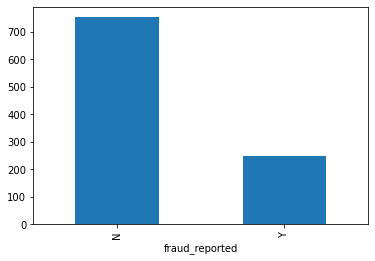

In [7]:
data_count_fraud = data.groupby(['fraud_reported']).count()
data_fraud = data_count_fraud['policy_number']
data_fraud.plot.bar(x='Fraud Reported', y='Count')

From above we can clearly see that more than half of data is in No category and remaining is in Yes.

<AxesSubplot:xlabel='insured_education_level'>

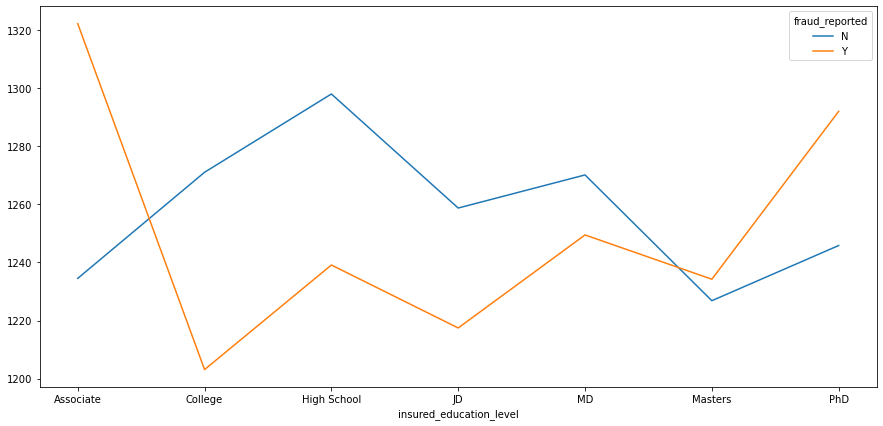

In [8]:
fig, ax = plt.subplots(figsize=(15,7))
data_avg_prem = data.groupby(['insured_education_level', 'fraud_reported']).mean()['policy_annual_premium']
data_avg_prem.unstack().plot(ax=ax)

From above we can say that as per the insured education level the Associate and PhD, the fraud is reported on peak. 

<AxesSubplot:xlabel='insured_occupation'>

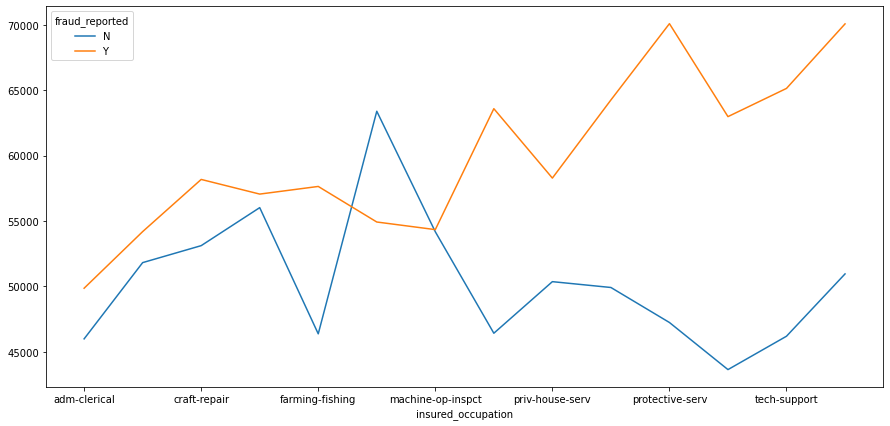

In [9]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby(['insured_occupation', 'fraud_reported']).mean()['total_claim_amount'].unstack().plot(ax=ax)

While when we take against insured occupation then in tech support are on peak.

Now we will find the correlation between the features using heat map.

[Text(0.5, 0, 'months_as_customer'),
 Text(1.5, 0, 'age'),
 Text(2.5, 0, 'policy_number'),
 Text(3.5, 0, 'policy_deductable'),
 Text(4.5, 0, 'policy_annual_premium'),
 Text(5.5, 0, 'umbrella_limit'),
 Text(6.5, 0, 'insured_zip'),
 Text(7.5, 0, 'capital-gains'),
 Text(8.5, 0, 'capital-loss'),
 Text(9.5, 0, 'incident_hour_of_the_day'),
 Text(10.5, 0, 'number_of_vehicles_involved'),
 Text(11.5, 0, 'bodily_injuries'),
 Text(12.5, 0, 'witnesses'),
 Text(13.5, 0, 'total_claim_amount'),
 Text(14.5, 0, 'injury_claim'),
 Text(15.5, 0, 'property_claim'),
 Text(16.5, 0, 'vehicle_claim'),
 Text(17.5, 0, 'auto_year'),
 Text(18.5, 0, '_c39')]

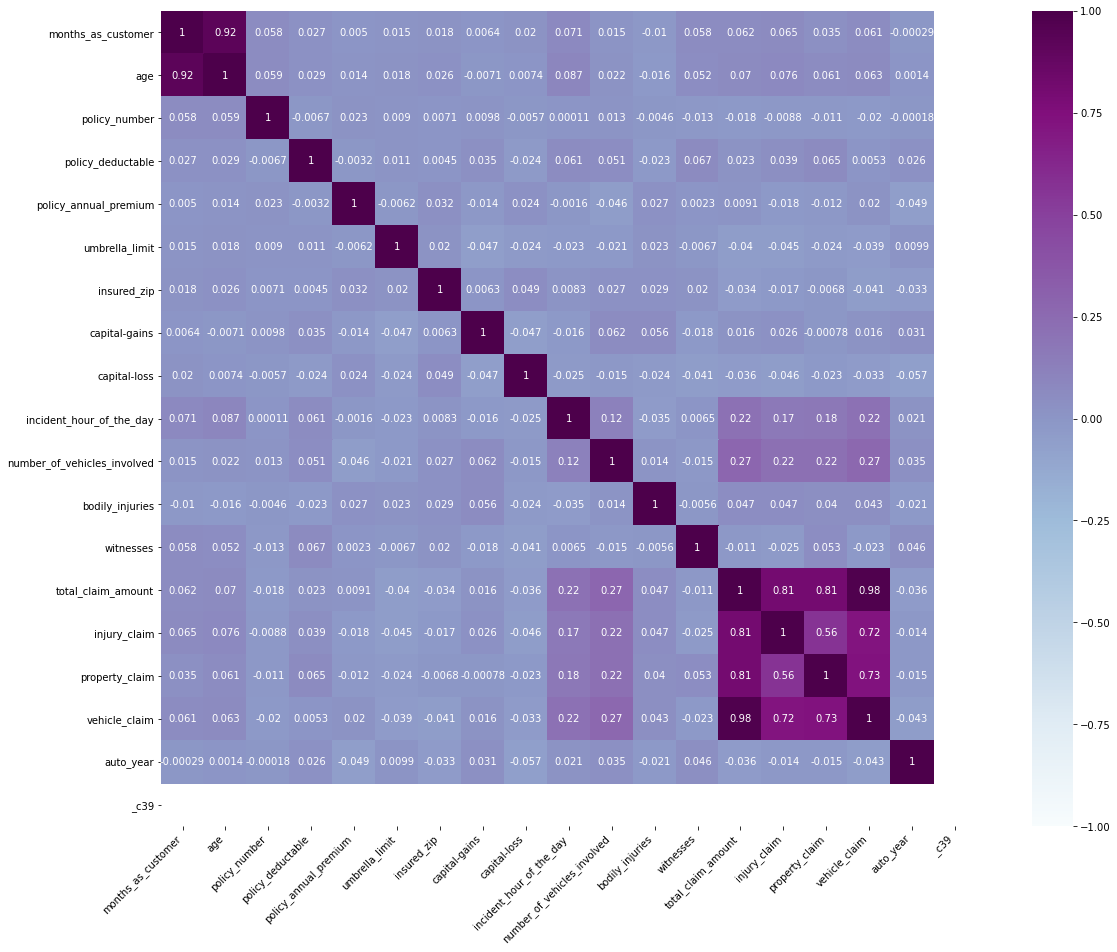

In [12]:
import seaborn as sns

plt.figure(figsize=(20, 15))

corr = data.corr()
ax = sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap= 'BuPu',square=True,annot = True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')

From we can see that policy_number,policy_bind_date,insured_zip,incident_location,incident_date,_c39 are less corelated so we can drop it.

In [13]:
deleteCols = ["policy_number", "policy_bind_date", "insured_zip", "incident_location", "incident_date", "_c39"]
data = data.drop(deleteCols, axis=1)
data

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,IL,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,OH,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,IL,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


Handling Categorical data:-

In [14]:
data.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                        int64
police_report_available  

In [15]:
list_hot_encoded = []
for column in data.columns:
    if(data[column].dtypes==object and column != 'fraud_reported'):
        data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
        list_hot_encoded.append(column)

data = data.drop(list_hot_encoded, axis=1)

data['fraud_reported'] = data['fraud_reported'].map( {'Y':1, 'N':0})

data

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,328,48,1000,1406.91,0,53300,0,5,1,1,...,0,0,0,0,0,0,0,0,0,0
1,228,42,2000,1197.22,5000000,0,0,8,1,0,...,0,0,0,0,0,0,0,0,0,0
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,...,0,1,0,0,0,0,0,0,0,0
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,...,0,0,0,0,0,1,0,0,0,0
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,1310.80,0,0,0,20,1,0,...,0,0,0,0,0,0,0,0,0,0
996,285,41,1000,1436.79,0,70900,0,23,1,2,...,0,0,0,0,0,0,0,0,0,0
997,130,34,500,1383.49,3000000,35100,0,4,3,2,...,0,0,0,0,0,0,0,0,0,0
998,458,62,2000,1356.92,5000000,0,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0


As now we handled the categorical data using Encoder now we will move to train the data and fitting the model.

In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

y = data['fraud_reported']
x = data.drop(['fraud_reported'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

1. Random Forest Classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train) 
print("Random Forest Score :")
rfc.score(x_test,y_test)

Random Forest Score :


0.7666666666666667

In [70]:
rf_y_pred = rfc.predict(x_test)
class_names = np.unique(np.array(y_test))
confusion_matrix(y_test, rf_y_pred)

array([[101,  12],
       [ 23,  14]], dtype=int64)

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       113
           1       0.54      0.38      0.44        37

    accuracy                           0.77       150
   macro avg       0.68      0.64      0.65       150
weighted avg       0.75      0.77      0.75       150

Cross-Validated Accuracy: 0.78


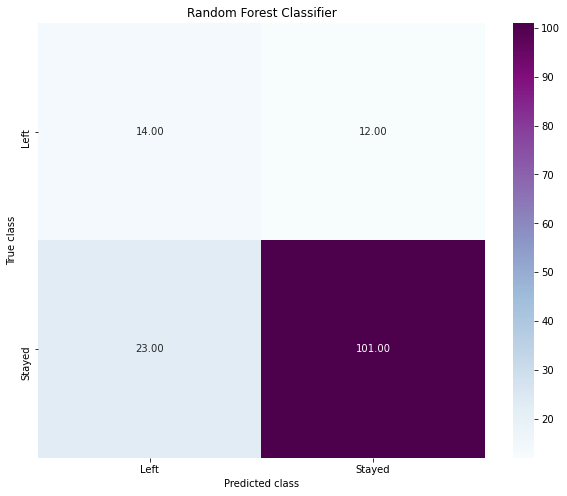

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_y_pred))

from sklearn.metrics import confusion_matrix
import seaborn as sns

logit_cm = confusion_matrix(rf_y_pred, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(logit_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] ,cmap = "BuPu")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest Classifier')

scores = cross_val_score(rfc, x, y, cv=10, scoring='accuracy')
rfc_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % rfc_accuracy)

Our Random Forest Classifier has accuracy of 72% , cross validation accuracy 78% and near about 80-82% of Precision, Recall and F1 Score.

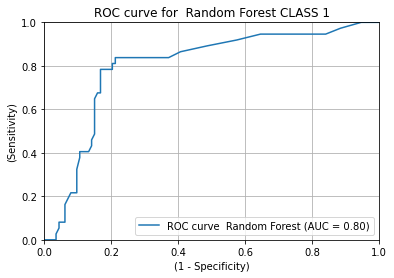

In [72]:
from sklearn.metrics import roc_curve, auc
rf_pred_prob = rfc.predict_proba(x_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_pred_prob)
roc_auc_rf = auc(fpr_rf, tpr_rf)
lw = 2
plt.plot(fpr_rf, tpr_rf,label='ROC curve  Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for  Random Forest CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

Above is the roc curve for Random Forest with auc of 80%.

2. Decision Tree Classifier

In [73]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train, y_train) 

print("Decision Tree Score : ")
DT.score(x_test,y_test)

Decision Tree Score : 


0.8066666666666666

In [74]:
DT_y_pred = DT.predict(x_test)
class_names = np.unique(np.array(y_test))
confusion_matrix(y_test, DT_y_pred)

array([[97, 16],
       [13, 24]], dtype=int64)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       113
           1       0.60      0.65      0.62        37

    accuracy                           0.81       150
   macro avg       0.74      0.75      0.75       150
weighted avg       0.81      0.81      0.81       150

Cross-Validated Accuracy: 0.78


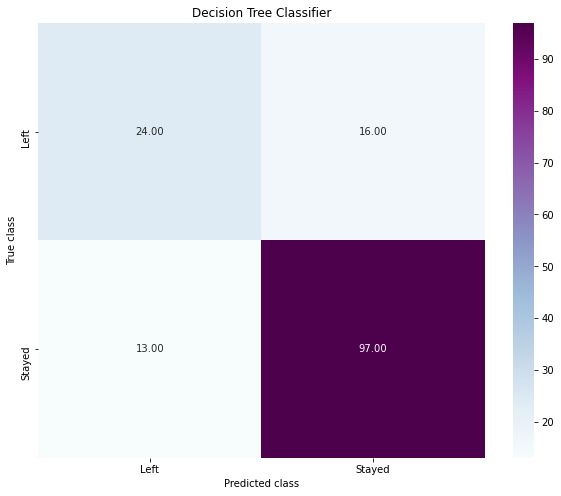

In [75]:
print(classification_report(y_test, DT_y_pred))

logit_cm = confusion_matrix(DT_y_pred, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(logit_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] ,cmap = "BuPu")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Decision Tree Classifier')

scores = cross_val_score(DT, x, y, cv=10, scoring='accuracy')
DT_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % DT_accuracy)

Our Decision Tree Classifier has accuracy of 80% , cross validation accuracy 78% and has 88% of Precision, 86% Recall and 87% F1 Score.

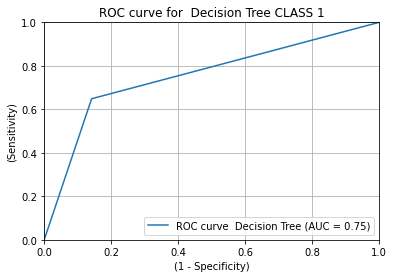

In [76]:
dt_pred_prob = DT.predict_proba(x_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_pred_prob)
roc_auc_dt = auc(fpr_dt, tpr_dt)
lw = 2
plt.plot(fpr_dt, tpr_dt,label='ROC curve  Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for  Decision Tree CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

Above is the roc curve for Decision Tree with auc of 75%.

3. SVC

In [77]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf',probability=True,random_state=42, gamma='auto') 
svm.fit(x_train, y_train) 
print("SVM Score :")
svm.score(x_test,y_test)

SVM Score :


0.7533333333333333

In [78]:
svm_y_pred = svm.predict(x_test)
class_names = np.unique(np.array(y_test))
confusion_matrix(y_test, svm_y_pred)

array([[113,   0],
       [ 37,   0]], dtype=int64)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86       113
           1       0.00      0.00      0.00        37

    accuracy                           0.75       150
   macro avg       0.38      0.50      0.43       150
weighted avg       0.57      0.75      0.65       150

Cross-Validated Accuracy: 0.75


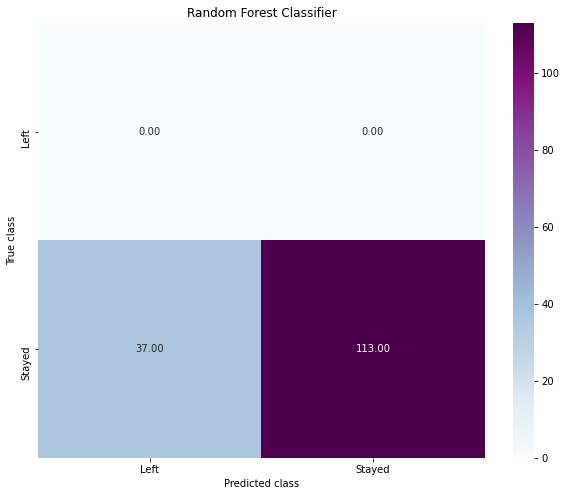

In [79]:
print(classification_report(y_test, svm_y_pred))

logit_cm = confusion_matrix(svm_y_pred, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(logit_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] ,cmap = "BuPu")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest Classifier')

scores = cross_val_score(svm, x, y, cv=10, scoring='accuracy')
svm_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % svm_accuracy)

Our SVM Classifier has accuracy of 75% , cross validation accuracy 75% and 75% of Precision, 100% Recall and 86% of F1 Score.

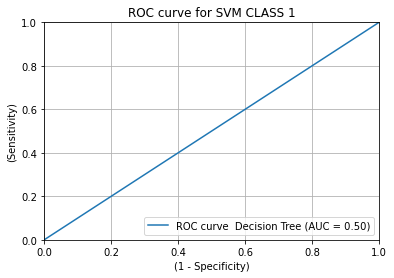

In [80]:
svm_pred_prob = svm.predict_proba(x_test)[:, 1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm_pred_prob)
roc_auc_svm = auc(fpr_svm, tpr_svm)
lw = 2
plt.plot(fpr_svm, tpr_svm,label='ROC curve  Decision Tree (AUC = %0.2f)' % roc_auc_svm)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for SVM CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

Above is the roc curve for SVM with auc of 50%.

4.KNN Classifier

In [81]:
from sklearn.neighbors import KNeighborsClassifier

print("KNN Score :")
KNN = KNeighborsClassifier(n_neighbors=12, weights='distance')
KNN.fit(x_train,y=y_train)
KNN.score(x_test,y_test)

KNN Score :


0.7333333333333333

In [82]:
knn_y_pred = KNN.predict(x_test)
class_names = np.unique(np.array(y_test))
confusion_matrix(y_test, knn_y_pred)

array([[108,   5],
       [ 35,   2]], dtype=int64)

              precision    recall  f1-score   support

           0       0.76      0.96      0.84       113
           1       0.29      0.05      0.09        37

    accuracy                           0.73       150
   macro avg       0.52      0.50      0.47       150
weighted avg       0.64      0.73      0.66       150

Cross-Validated Accuracy: 0.73


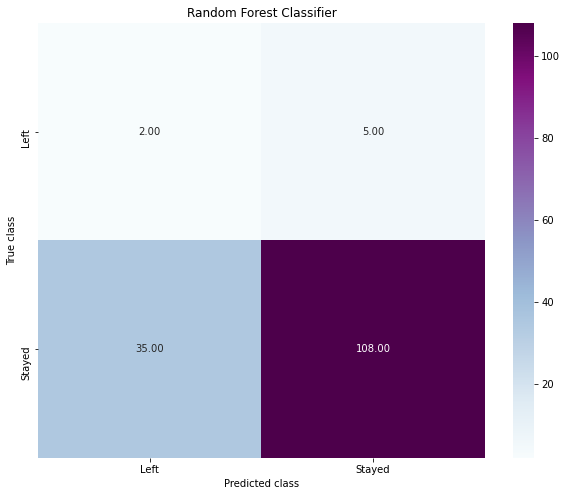

In [83]:
print(classification_report(y_test, knn_y_pred))

logit_cm = confusion_matrix(knn_y_pred, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(logit_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] ,cmap = "BuPu")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest Classifier')

scores = cross_val_score(KNN, x, y, cv=10, scoring='accuracy')
knn_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % knn_accuracy)

Our KNN Classifier has accuracy of 73% , cross validation accuracy 73% and has 76% of Precision, 96% Recall and 82% of F1 Score.

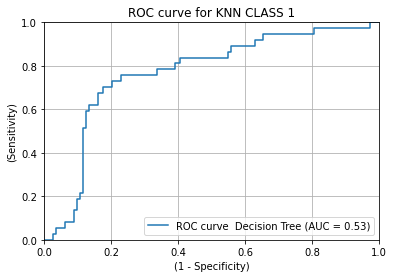

In [84]:
knn_pred_prob = KNN.predict_proba(x_test)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_pred_prob)
roc_auc_knn = auc(fpr_knn, tpr_knn)
lw = 2
plt.plot(fpr, tpr,label='ROC curve  Decision Tree (AUC = %0.2f)' % roc_auc_knn)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for KNN CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

Above is the roc curve for KNN with auc of 53%.

5. Naive Bayes Classifier

In [85]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
nb.fit(x_train, y_train)
print("Naive Bayes Classifier Score :")
nb.score(x_test,y_test)

Naive Bayes Classifier Score :


0.8

In [86]:
nb_y_pred = nb.predict(x_test)
class_names = np.unique(np.array(y_test))
confusion_matrix(y_test, nb_y_pred)

array([[97, 16],
       [14, 23]], dtype=int64)

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       113
           1       0.59      0.62      0.61        37

    accuracy                           0.80       150
   macro avg       0.73      0.74      0.74       150
weighted avg       0.80      0.80      0.80       150

Cross-Validated Accuracy: 0.82


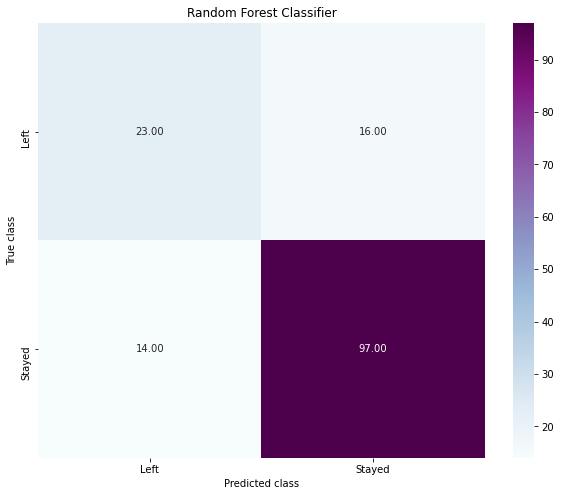

In [87]:
print(classification_report(y_test, nb_y_pred))

logit_cm = confusion_matrix(nb_y_pred, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(logit_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] ,cmap = "BuPu")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest Classifier')

scores = cross_val_score(nb, x, y, cv=10, scoring='accuracy')
nb_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % nb_accuracy)

Our NB Classifier has accuracy of 80% , cross validation accuracy 82% and has 87% of Precision, 86% Recall and 87% of F1 Score.

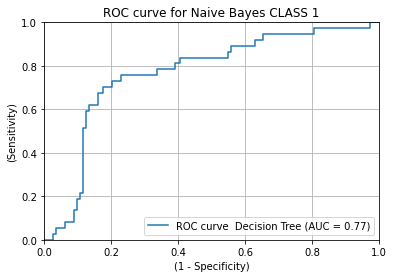

In [88]:
nb_pred_prob = nb.predict_proba(x_test)[:, 1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, nb_pred_prob)
roc_auc_nb = auc(fpr_nb, tpr_nb)
lw = 2
plt.plot(fpr, tpr,label='ROC curve  Decision Tree (AUC = %0.2f)' % roc_auc_nb)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for Naive Bayes CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

Above is the roc curve for NB with auc of 77%.

Comparing the models:-

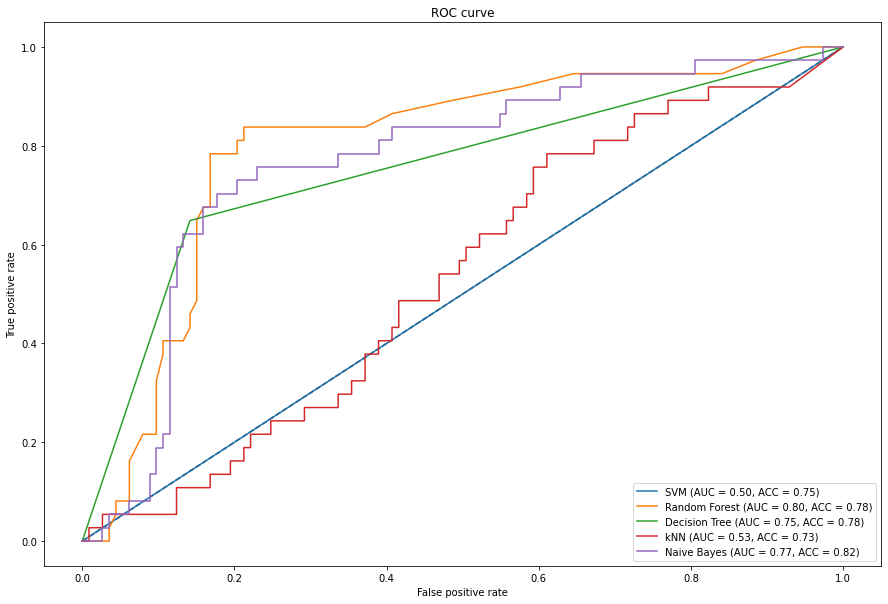

In [93]:
plt.figure(figsize=(15, 10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = %0.2f, ACC = %0.2f)' % (roc_auc_svm, svm_accuracy))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f, ACC = %0.2f)'%(roc_auc_rf, rfc_accuracy))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = %0.2f, ACC = %0.2f)'%(roc_auc_dt, DT_accuracy))
plt.plot(fpr_knn, tpr_knn, label='kNN (AUC = %0.2f, ACC = %0.2f)'%(roc_auc_knn, knn_accuracy))
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes (AUC = %0.2f, ACC = %0.2f)'%(roc_auc_nb, nb_accuracy))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

From above we can see that the Naive Bayes roc curve is the best amongst all the models.

In [95]:
test_target = y_test.copy()
test_target.reset_index(drop=True, inplace=True)
test_target = test_target.replace({1:'Y', 0:'N'})

predicted_target = nb.predict(x_test)
predicted_target = pd.Series(predicted_target).replace({1:'Y', 0:'N'})

In [96]:
ranks=pd.DataFrame(data=
                   { 
                       'RealClass':test_target, 
                       'PredictedClass':predicted_target,
                       'rank':nb_pred_prob
                   })
ranks.sort_values(by=['rank'],ascending=False,inplace=True)
ranks.head()

,RealClass,PredictedClass,rank
109,N,Y,0.998957
116,N,Y,0.989795
145,N,Y,0.980312
138,Y,Y,0.979921
149,N,Y,0.945835


Saving the model:-

In [97]:
import joblib 
joblib.dump(nb,"InsuranceFraud")

['InsuranceFraud']